In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os
import csv
from scipy.stats import linregress


# Import API key
from api_keys import api_key

# set up the query URL
#api_key = api_keys.api_key
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + api_key

print(url)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = (os.path.join('cities.csv'))

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) # change to 1500 at end
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # replace space with a '%20' to correct the URL
    city = city.replace(' ', '%20')
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count & check lat lon output
#len(cities)
#cities
#print([lat_lng for lat_lng in zip(lats, lngs)])

In [3]:
# PERFORM TEST API CALL
response = requests.get(f'{url}&q={city}').json()
# test response
#response

In [4]:

# Create emtpty lists to append all of the called API data into
cityName = []
country = []
date = []
tempF = []
humidity = []
clouds = []
windMPH = []
lat = []
lon = []

# initiate call counter
count = 1

# Logging statement
print(f'Retrieving Data')
print(f'-------------------------------')

# loop through all cities
for city in cities:
    
    # Set up a try loop in case coordinates generated have no city associated
    try:
        response = requests.get(f'{url}&q={city}').json()
        cityName.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        tempF.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        windMPH.append(response['wind']['speed'])
        cityRecord = (response['name'])
        print(f'Record Processing  {count} | {cityRecord}')
        print(f'{url}&q={city}')
        # Increase counter by one 
        count= count + 1
        # Wait a second in loop to not over exceed rate limit
        time.sleep(1.01)
    except:
        print('City not found...skipping...')
    # If no record found "skip" to next call
    continue

Retrieving Data
-------------------------------
City not found...skipping...
Record Processing  1 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=upernavik
Record Processing  2 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=atuona
Record Processing  3 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=hobart
Record Processing  4 | Filadelfia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=filadelfia
City not found...skipping...
Record Processing  5 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=ixtapa
Record Processing  6 | Bulgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=bulgan
Record Processing  7 | Krasnyy Chikoy
ht

Record Processing  56 | Karaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=karaman
Record Processing  57 | Coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=coihaique
Record Processing  58 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=yellowknife
Record Processing  59 | Sijunjung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=sijunjung
City not found...skipping...
Record Processing  60 | Linqu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=linqu
Record Processing  61 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=albany
Record Processing  62 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=9

Record Processing  110 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=pevek
Record Processing  111 | Cordoba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=cordoba
Record Processing  112 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=clyde%20river
Record Processing  113 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=new%20norfolk
Record Processing  114 | Hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=hovd
Record Processing  115 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=east%20london
Record Processing  116 | Luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8

Record Processing  166 | Sarangani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=sarangani
Record Processing  167 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=fortuna
Record Processing  168 | Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=bonavista
City not found...skipping...
Record Processing  169 | Jalingo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=jalingo
Record Processing  170 | Zhicheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=zhicheng
Record Processing  171 | Pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=pitimbu
Record Processing  172 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&ap

Record Processing  221 | Luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=luanda
Record Processing  222 | Champoton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=champoton
Record Processing  223 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=ponta%20do%20sol
Record Processing  224 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=saldanha
Record Processing  225 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=cidreira
Record Processing  226 | Tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=tateyama
Record Processing  227 | Vinh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8ac

Record Processing  276 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=mahebourg
Record Processing  277 | Mala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=mala
Record Processing  278 | Quzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=quzhou
Record Processing  279 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=dingle
Record Processing  280 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=carnarvon
Record Processing  281 | Eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=eyl
Record Processing  282 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=victoria


Record Processing  332 | Berwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=berwick
Record Processing  333 | Ust-Tsilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=ust-tsilma
Record Processing  334 | Lerwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=lerwick
Record Processing  335 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=santa%20maria
Record Processing  336 | Erdenet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=erdenet
Record Processing  337 | Bautzen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=bautzen
Record Processing  338 | Skjervoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca8

Record Processing  387 | Mattru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=mattru
Record Processing  388 | Ambanja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=ambanja
City not found...skipping...
Record Processing  389 | Kanye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=kanye
Record Processing  390 | Kailua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=kailua
Record Processing  391 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=makakilo%20city
Record Processing  392 | Ponta Delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=ponta%20delgada
Record Processing  393 | Daru
http://api.openweathermap.org/data/2.5/weather?units=Impe

Record Processing  442 | Nchelenge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=nchelenge
Record Processing  443 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=bilibino
Record Processing  444 | Kantunilkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=kantunilkin
Record Processing  445 | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=nemuro
Record Processing  446 | Eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=eureka
Record Processing  447 | Riachao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=riachao
City not found...skipping...
Record Processing  448 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Record Processing  496 | Sladkovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=sladkovo
Record Processing  497 | La Ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=la%20ronge
Record Processing  498 | Olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=olinda
Record Processing  499 | Deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=deputatskiy
Record Processing  500 | Aleksandrov Gay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=aleksandrov%20gay
Record Processing  501 | Perth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=perth
Record Processing  502 | Lasem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341

City not found...skipping...


In [33]:
weatherDictionary = {'Country': country, 'City': cityName, 
                     'Date': date, 'Temperature': tempF, 'Cloud Density': clouds,
                     'Humidity': humidity, 'Humidity': humidity, 'Wind(MPH)': windMPH,
                     'Latitude': lat, 'Longitude': lon}
weatherDF = pd.DataFrame(weatherDictionary)

weatherDF.to_csv(os.path.join('weatherData.csv'))
weatherDF.head()

,Country,City,Date,Temperature,Cloud Density,Humidity,Wind(MPH),Latitude,Longitude
0,GL,Upernavik,1569715128,42.48,0,59,6.71,72.79,-56.15
1,PF,Atuona,1569715130,79.90,20,72,10.74,-9.80,-139.03
2,AU,Hobart,1569715098,53.60,40,58,8.05,-42.88,147.33
3,PY,Filadelfia,1569715132,83.45,0,31,4.59,-22.35,-60.04
4,MX,Ixtapa,1569714868,89.60,40,75,11.41,20.71,-105.21


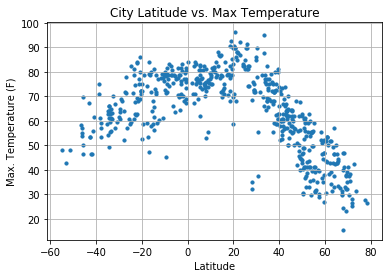

In [35]:

# Build scatterplot using column headers for hte X then Y Axis
plt.scatter(weatherDF['Latitude'], weatherDF['Temperature'], marker='o', s=10)
# add other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# save graph
plt.savefig(os.path.join('temperature-VS-latitude.png'))
# Show graph
plt.show()

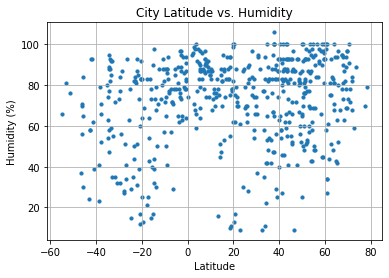

In [36]:

# Build a scatter plot for each data type
plt.scatter(weatherDF["Latitude"], weatherDF["Humidity"], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('humidity-VS-latitude.png'))
# Show plot
plt.show()

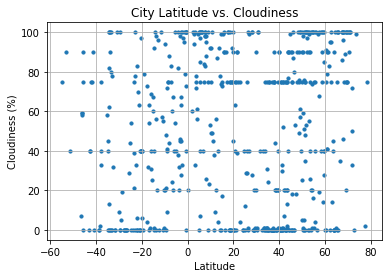

In [37]:

# Build a scatter plot for each data type
plt.scatter(weatherDF['Latitude'], weatherDF['Cloud Density'], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('cloudDeinsity-VS-latitude.png'))
# Show plot
plt.show()

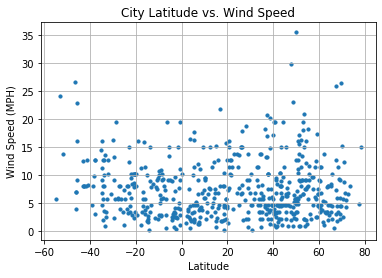

In [38]:

# Build a scatter plot for each data type
plt.scatter(weatherDF['Latitude'], weatherDF['Wind(MPH)'], marker='o', s=10)
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('windSpeed-VS-latitude.png'))
# Show plot
plt.show()

WeatherPy

Analysis

Weather becomes warmer when approaching the equator and pulling in data at this time of year shows that the Southern Hemisphere on average is warmer than the Northern, due to the tilt of the earth.
There is no strong correlation between latitude and cloudiness or wind.
It is interesting to see that there does not appear to be any correlation between Latitude and Humidity either, despite a clear correlation between Latitude and Temperature.

In [60]:
north = weatherDF[weatherDF['Latitude'] >= 0]
south = weatherDF[weatherDF['Latitude'] < 0]

The r-squared is -0.8182927303634562
The regression expression is:  Y = -0.7388542497964247*x + 89.94975257584045


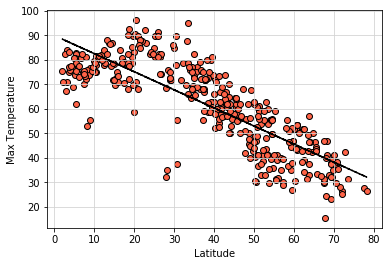

In [66]:
# Defining the variables
lat_n = north["Latitude"]
max_temp_n = north["Temperature"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, max_temp_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, max_temp_n, edgecolors="black",facecolors="tomato")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
# plt.savefig("../Images/Regression(north)_Lat_vs_MaxTemp(fig5).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

The r-squared is 0.647659653684448
The regression expression is:  Y = 0.4766415128519843*x + 78.02692662899753


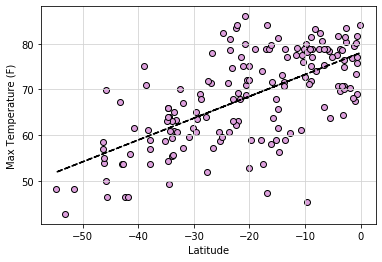

In [67]:
# Defining the variables
lat_s = south["Latitude"]
max_temp_s = south["Temperature"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, max_temp_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, max_temp_s ,edgecolors="black",facecolors="plum")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
# plt.savefig("../Images/Regression(south)_Lat_vs_MaxTemp(fig6).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

The r-squared is -0.013879306965401805
The regression expression is:  Y = -0.01427813305109907*x + 75.80210677888947


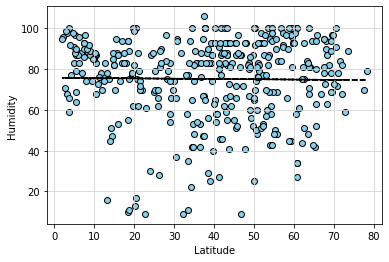

In [74]:
#  Defining the variables
lat_n = north["Latitude"]
humid_n = north["Humidity"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, humid_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, humid_n ,edgecolors="black",facecolors="skyblue")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
# plt.savefig("../Images/Regression(north)_Lat_vs_Humidity(fig7).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

The r-squared is 0.21885699181022425
The regression expression is:  Y = 0.3563333948489673*x + 73.93797935771467


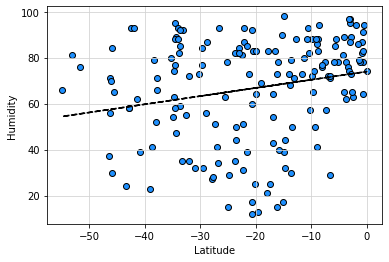

In [73]:
# Defining the variables
lat_s = south["Latitude"]
humid_s = south["Humidity"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, humid_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, humid_s ,edgecolors="black",facecolors="dodgerblue")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
# plt.savefig("../Images/Regression(south)_Lat_vs_Humidity(fig8).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

The r-squared is 0.01898994080257668
The regression expression is:  Y = 0.038316697433426354*x + 50.54966857850226


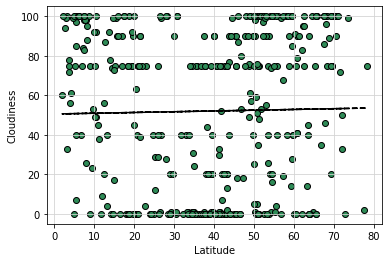

In [76]:
# Defining the variables
lat_n = north["Latitude"]
cloud_n = north["Cloud Density"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, cloud_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, cloud_n ,edgecolors="black",facecolors="seagreen")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
# plt.savefig("../Images/Regression(north)_Lat_vs_Cloudiness(fig9).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

The r-squared is 0.1647066016231718
The regression expression is:  Y = 0.4265303650347361*x + 53.98576460584145


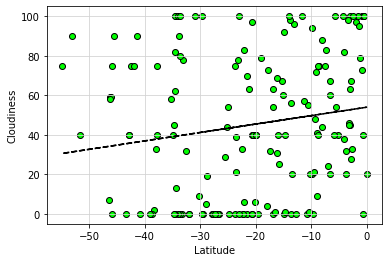

In [77]:
# Defining the variables
lat_s = south["Latitude"]
cloud_s = south["Cloud Density"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, cloud_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, cloud_s ,edgecolors="black",facecolors="lime")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
# plt.savefig("../Images/Regression(south)_Lat_vs_Cloudiness(fig10).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

The r-squared is 0.062055813859342
The regression expression is:  Y = 0.01667615056692904*x + 6.748963133416687


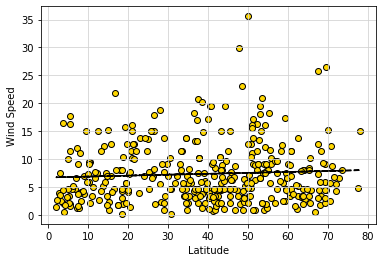

In [81]:

# Defining the variables
lat_n = north["Latitude"]
wind_n = north["Wind(MPH)"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, wind_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, wind_n ,edgecolors="black",facecolors="gold")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")

# Save the figure
# plt.savefig("../Images/Regression(north)_Lat_vs_Wind_Speed(fig11).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

The r-squared is -0.30066084553841155
The regression expression is:  Y = -0.10552873485680105*x + 5.512641707210282


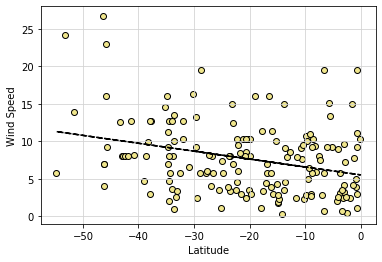

In [80]:
# Defining the variables
lat_s = south["Latitude"]
wind_s = south["Wind(MPH)"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, wind_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, wind_s ,edgecolors="black",facecolors="khaki")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
# plt.savefig("../Images/Regression(south)_Lat_vs_Wind_Speed(fig12).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()